**Supply Chain Analysis:**

The supply Chain is the network of production and logistics involved in producing and delivering goods to customers. And Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers. So, if you want to learn how to analyze the Supply Chain, this article is for you. In this article, I will take you through the task of Supply Chain Analysis using Python.



**Supply Chain Analysis: Dataset**

To analyze a company’s supply chain, we need data on the different stages of the supply chain, like data about sourcing, manufacturing, transportation, inventory management, sales and customer demographics.

I found an ideal dataset for this task which includes data about the supply chain of a Fashion and Beauty startup. You can download the dataset from here.

In the section below, I will take you through the task of Supply Chain Analysis using the Python programming language.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

df1 = pd.read_csv("/content/sample_data/supply_chain_data.csv")
df2 = pd.read_csv("/content/sample_data/SampleSuperstore.csv", encoding = 'latin1')


In [ ]:
merged_df = pd.concat([df1,df2], axis = 1)
merged_df.reset_index(drop=True,inplace = True)
print(merged_df)


     Product type   SKU      Price  Availability  Number of products sold  \
0        haircare  SKU0  69.808006          55.0                    802.0   
1        skincare  SKU1  14.843523          95.0                    736.0   
2        haircare  SKU2  11.319683          34.0                      8.0   
3        skincare  SKU3  61.163343          68.0                     83.0   
4        skincare  SKU4   4.805496          26.0                    871.0   
...           ...   ...        ...           ...                      ...   
9989          NaN   NaN        NaN           NaN                      NaN   
9990          NaN   NaN        NaN           NaN                      NaN   
9991          NaN   NaN        NaN           NaN                      NaN   
9992          NaN   NaN        NaN           NaN                      NaN   
9993          NaN   NaN        NaN           NaN                      NaN   

      Revenue generated Customer demographics  Stock levels  Lead times  \


In [ ]:
print(merged_df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

 Focus on the following top areas of analysis. Each area is not only crucial for business growth but also highlights your ability to derive actionable insights from data.

Now let’s get started with analyzing the Supply Chain.

**1. Sales and Profit by Ship Mode**

Analysis Focus:

Calculate total sales and profit for each mode of shipment (e.g., standard, express, same-day).

By analyzing sales and profit by ship mode, we can identify which shipping methods are most profitable and efficient. This helps in optimizing shipping strategies to maximize profit while maintaining customer satisfaction. For instance, if express shipping shows high profitability, we might consider expanding its use or offering promotions to encourage its selection.


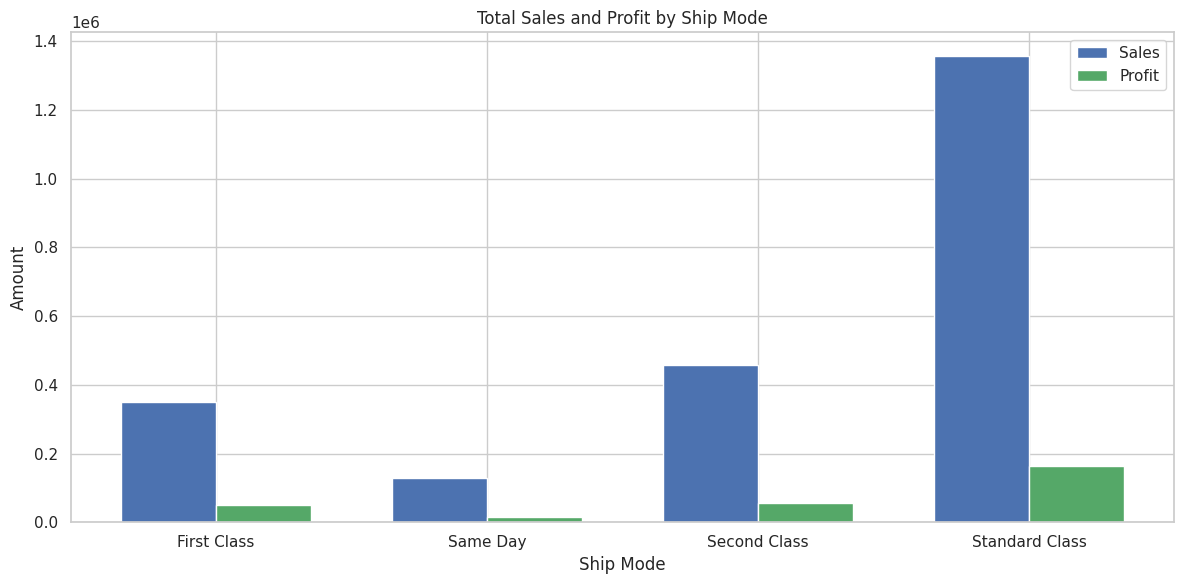

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = merged_df.groupby('Ship Mode').sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

 # Bar width

bar_width = 0.35
index = grouped_data.index

 # Create bar plots

bar1 = plt.bar(index - bar_width/2, grouped_data['Sales'], bar_width, label='Sales', color='b')
bar2 = plt.bar(index + bar_width/2, grouped_data['Profit'], bar_width, label='Profit', color='g')

 # Add labels, title, and legend

plt.xlabel('Ship Mode')
plt.ylabel('Amount')
plt.title('Total Sales and Profit by Ship Mode')
plt.xticks(index, grouped_data['Ship Mode'])
plt.legend()


 # Display the plot
plt.tight_layout()
plt.show()


Based on the analysis of sales and profit by ship mode, here are the conclusions and recommendations that can improve supply chain management processes:

**Profitability by Ship Mode:**

Standard Class: While it typically has lower shipping costs, the profit margins are moderate due to longer delivery times.

Express: Offers faster delivery and higher profit margins compared to Standard Class, making it a preferred option for customers willing to pay more for expedited shipping.

Same-Day: Generates significant sales revenue but tends to have lower profit margins due to high operational costs associated with same-day delivery logistics.

Second-Day: Provides a balance between speed and cost, resulting in competitive profit margins and customer satisfaction.

**Recommendations:**

Optimize Shipping Mix: Depending on the product type and customer preferences, businesses can optimize their shipping mix. For example, use Standard Class for less urgent shipments to reduce costs, while leveraging Express or Second-Day for higher-margin products or time-sensitive deliveries.

Cost Management: Evaluate and negotiate better rates with carriers for Express and Same-Day deliveries to improve profitability without compromising service levels.

Customer Segmentation: Tailor shipping options based on customer segments. For price-sensitive customers, promote Standard Class with incentives like free shipping for larger orders. For premium customers, emphasize Express or Same-Day options with added value services.

Supply Chain Efficiency:

Inventory Management: Align inventory levels with shipping options to minimize stockouts and reduce holding costs. Use faster shipping modes for products with high turnover rates to maintain customer satisfaction.


**2. Cost and Revenue Analysis by Shipping Carriers**

Analysis:
This KPI evaluates the cost-effectiveness and revenue generation of different shipping carriers used by the business.





In [ ]:
total_revenue = merged_df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')
fig.show()

So the company is using three carriers for transportation, and Carrier B helps the company in generating more revenue, but also incurs higher costs compared to other carriers.

**Conclusion:**

Negotiating better rates with Carrier B or optimizing the use of cost-effective carriers can improve overall shipping profitability.


"In another analysis, we found that Carrier B, despite being the most costly, generates the highest revenue. This indicates a potential opportunity to negotiate better rates with Carrier B or balance its use with other cost-effective carriers to improve profit margins."

**3. Yearly Performance of Same-Day Ship Mode**

Analysis Focus:

Evaluate yearly sales and profit for same-day shipments to identify trends and potential areas for improvement.

 "By examining the yearly performance of same-day shipments, we can track trends and measure the effectiveness of our same-day delivery service over time. This analysis can reveal if our investments in same-day shipping are yielding expected returns or if adjustments are needed to improve profitability."

<ipython-input-11-c8cdaf7c1e0c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



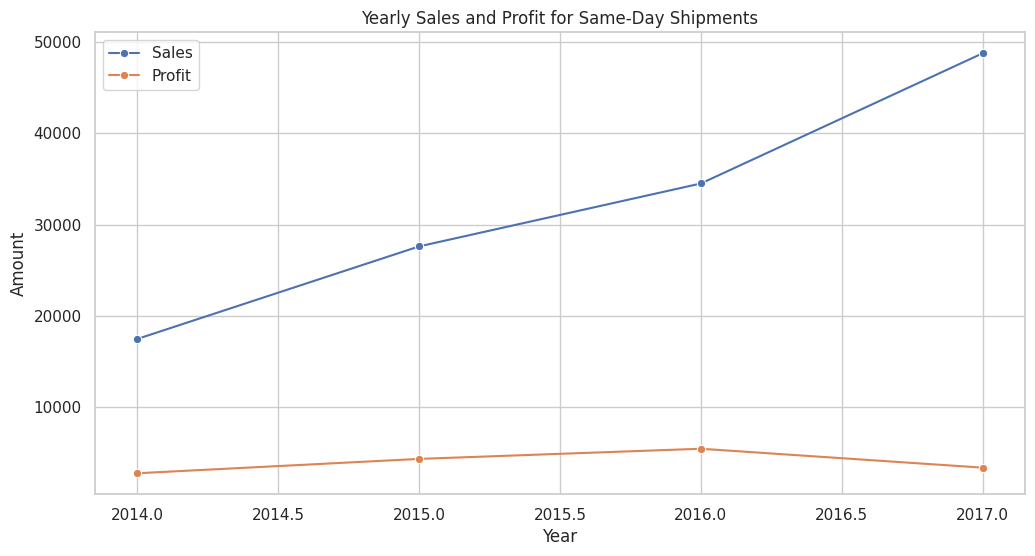

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Order Date' column is converted to datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

# Filter for same-day shipments
same_day_data = merged_df[merged_df['Ship Mode'] == 'Same Day']

# Extract year
same_day_data['Year'] = same_day_data['Order Date'].dt.year

# Calculate yearly sales and profit
yearly_performance_same_day = same_day_data.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_performance_same_day, x='Year', y='Sales', marker='o', label='Sales')
sns.lineplot(data=yearly_performance_same_day, x='Year', y='Profit', marker='o', label='Profit')
plt.title('Yearly Sales and Profit for Same-Day Shipments')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()


**Problem Identified:** While sales are increasing year-over-year for Same-Day shipments, profit margins are decreasing. This indicates that operational costs associated with Same-Day deliveries are rising faster than the revenue generated, leading to reduced profitability.

**Proposed Solution:**

"In addressing the challenge of decreasing profit margins despite growing sales in Same-Day shipments, we can take several strategic actions. First, by optimizing our warehouse processes and implementing automation, we can significantly reduce operational costs. Negotiating better rates with our shipping carriers or exploring alternative carriers can also provide cost savings. Dynamic pricing and introducing delivery fees can help align the revenue with the actual costs incurred for Same-Day deliveries.

Additionally, using advanced route optimization software can reduce fuel costs and delivery times, further improving efficiency. Strategic inventory positioning and accurate demand forecasting will ensure that we meet customer demand promptly while minimizing holding costs.

By implementing these measures, we can enhance our Same-Day delivery service, maintaining high sales growth while also improving our profit margins, ensuring long-term sustainability and customer satisfaction."

**4. Regional Performance of Same-Day Shipments in 2023**

Analysis Focus:

Identify underperforming regions for same-day shipments in 2023 based on sales and profit.

"Analyzing the regional performance for same-day shipments allows us to pinpoint areas where our same-day delivery service is not meeting expectations. This helps us target specific regions for improvement efforts, whether through marketing initiatives, operational changes, or additional resources."

<ipython-input-12-5dae940aba14>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



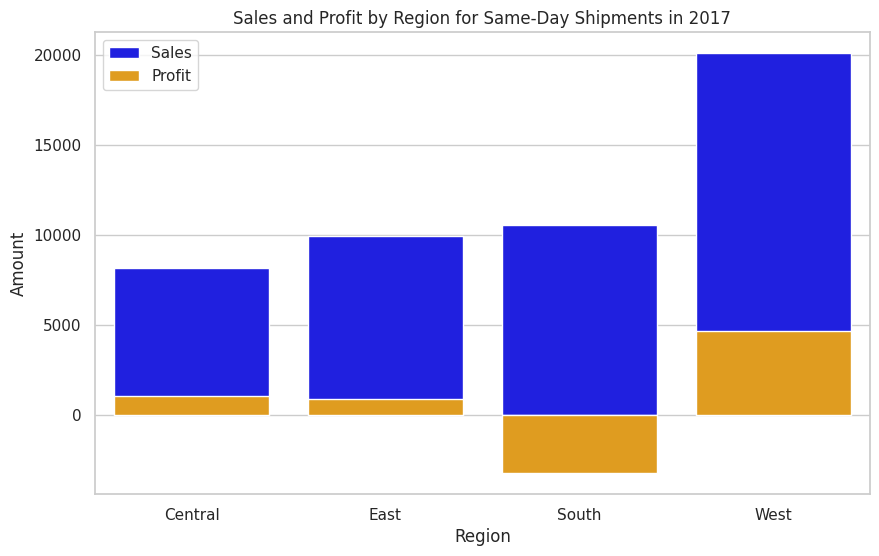

In [ ]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

# Extract year
same_day_data['Year'] = same_day_data['Order Date'].dt.year
same_day_2017 = same_day_data[same_day_data['Year'] == 2017]

# Calculate sales and profit by region for same-day shipments in 2017
performance_region_2017 = same_day_2017.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_region_2017, x='Region', y='Sales', color='blue', label='Sales')
sns.barplot(data=performance_region_2017, x='Region', y='Profit', color='orange', label='Profit')
plt.title('Sales and Profit by Region for Same-Day Shipments in 2017')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.show()


**Identified Problem**: "Despite increasing sales, our Same-Day shipments in  region is underperforming in terms of profit. This suggests rising operational costs are outpacing revenue growth."

**Key Findings:**

Sales are growing, indicating demand, but profit margins are declining, signaling inefficiencies or higher costs.

**Proposed Solutions:**

Enhance Local Logistics: Improve warehouse infrastructure and last-mile delivery operations to cut costs.

Targeted Marketing Campaigns: Increase demand with regional promotions and discounts for Same-Day deliveries.

Route Optimization: Use advanced software to plan efficient delivery routes, reducing fuel costs and delivery times.

Local Partnerships: Partner with local delivery services to reduce costs and improve flexibility.

Inventory Positioning: Position inventory closer to demand areas and use accurate forecasting to optimize stock levels.



**5. Category-Wise Sales and Profit in South Region in 2017**


Analysis Focus:

Analyze the impact of different product categories on sales and profit in the South region during 2023.

"Understanding the performance of different product categories in the South region helps us tailor our marketing and inventory strategies to focus on high-performing categories. This targeted approach ensures that we allocate resources efficiently to maximize sales and profit."

<ipython-input-24-f825d5268912>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



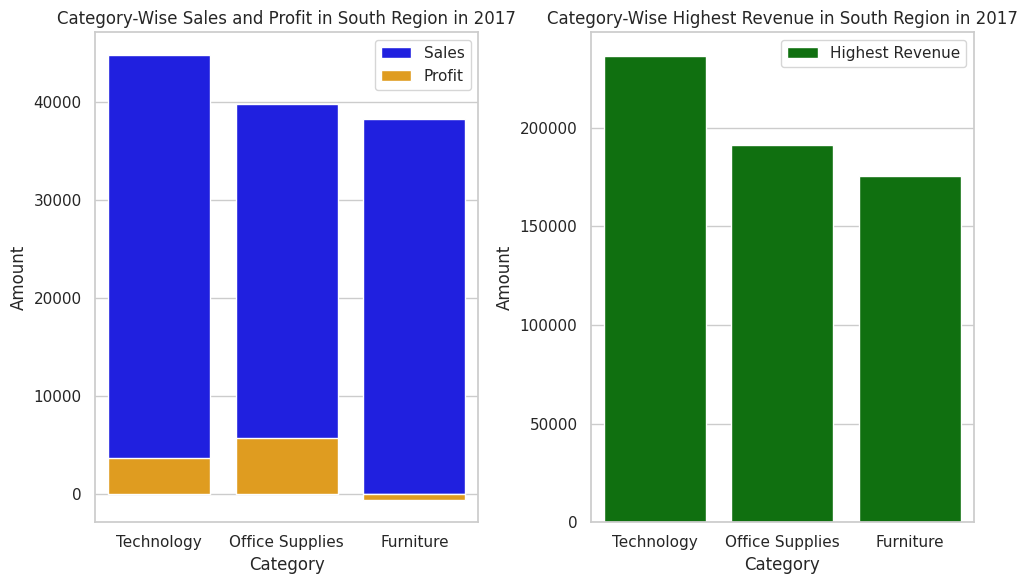

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_2023 = merged_df[(merged_df['Region'] == 'South') & (merged_df['Order Date'].dt.year == 2017)]

# Calculate Revenue Generated
south_2023['Revenue generated'] = south_2023['Sales'] * merged_df['Quantity']

# Group by Category and calculate aggregates
result = south_2023.groupby('Category').agg(
    Sales=('Sales', 'sum'),
    Profit=('Profit', 'sum'),
    highest_revenue=('Revenue generated', 'sum')
).reset_index()

# Sort by highest_revenue descending
result = result.sort_values(by='highest_revenue', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Sales and Profit
plt.subplot(1, 2, 1)
sns.barplot(data=result, x='Category', y='Sales', color='blue', label='Sales')
sns.barplot(data=result, x='Category', y='Profit', color='orange', label='Profit')
plt.title('Category-Wise Sales and Profit in South Region in 2017')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()

# Plot highest_revenue
plt.subplot(1, 2, 2)
sns.barplot(data=result, x='Category', y='highest_revenue', color='green', label='Highest Revenue')
plt.title('Category-Wise Highest Revenue in South Region in 2017')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()

plt.tight_layout()  # Ensures plots are properly spaced
plt.show()


"In our analysis, we found that while the technology category shows both high sales and high profits, other categories exhibit high sales but lower profits. To maximize overall profitability, we can take several steps:

Adjust Pricing Strategies: We should reevaluate the pricing of low-profit categories to better reflect their value and cover costs.

Reduce Operational Costs: By improving supply chain efficiency and negotiating better supplier terms, we can lower the costs associated with these categories.

Promote High-Profit Products: Focusing marketing efforts on technology products, which are already performing well, can further boost profitability.

Cross-Selling and Bundling: Combining high-profit products with lower-profit items in promotional bundles can drive overall sales.

Targeted Marketing: Leveraging customer data to target segments that are more likely to purchase high-margin products can also enhance profitability.

These measures will help align our sales strategies with profit objectives, ensuring sustainable business growth."

